In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import contextily as cx

In [12]:
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [49]:
import os

In [3]:
# nybg coordinates
y_coords = [-73.8784399, -73.8796194,-73.8833816,
            -73.8759639,-73.8778364, -73.8762106, -73.8773107,-73.8780359]
x_coords = [40.8568287,40.8654710, 40.8653050,40.8663435, 40.8613773, 40.8661447,
            40.8616124,40.8676297]
collars = ['be_ul2','bl_ml1','br_hl3', 'bt_fe2','bt_fe3', 'bt_fi1','bt_fi2',
           'bw_hl1']

In [4]:
df = pd.DataFrame({'collars': collars,
                        'y_coords': y_coords,
                        'x_coords': x_coords})

In [5]:
df['geometry'] = df.apply(lambda row: Point(row['y_coords'],row['x_coords']),axis=1)

C:\Users\roseh\miniconda3\envs\rs-env\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [6]:
gdf = gpd.GeoDataFrame(df,crs=('EPSG:4326'))

In [7]:
gdf

,collars,y_coords,x_coords,geometry
0,be_ul2,-73.878440,40.856829,POINT (-73.87844 40.85683)
1,bl_ml1,-73.879619,40.865471,POINT (-73.87962 40.86547)
2,br_hl3,-73.883382,40.865305,POINT (-73.88338 40.86530)
3,bt_fe2,-73.875964,40.866343,POINT (-73.87596 40.86634)
4,bt_fe3,-73.877836,40.861377,POINT (-73.87784 40.86138)
5,bt_fi1,-73.876211,40.866145,POINT (-73.87621 40.86614)
6,bt_fi2,-73.877311,40.861612,POINT (-73.87731 40.86161)
7,bw_hl1,-73.878036,40.867630,POINT (-73.87804 40.86763)


In [32]:
bronx = cx.Place('Bronx,New York',zoom=13)

In [33]:
gdf_wm = gdf.to_crs(epsg=3857)

In [46]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\reports\figures'

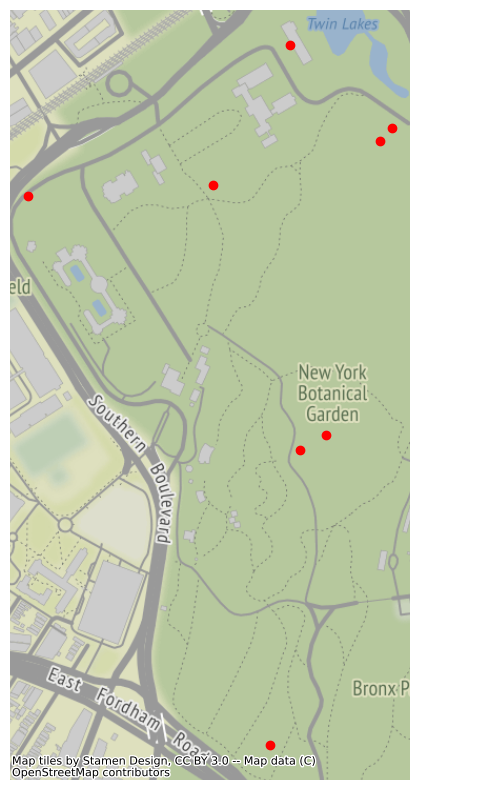

In [51]:
ax = gdf_wm.plot(figsize=(8,8),color='red')
cx.add_basemap(ax=ax,zoom=16)
ax.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(data_path,'nybg_map.png'))
plt.show()

In [56]:
y_coords = [-73.9078107, -73.9066691, -73.9063969, -73.9068847]
x_coords = [41.0035822, 41.0061976, 41.0060562, 41.0034192]
collars = ['LC_HL3', 'LH_SV1', 'LH_UL3', 'LM_HL1']

In [58]:
df2 = pd.DataFrame({'collars': collars,
                        'y_coords': y_coords,
                        'x_coords': x_coords})

In [59]:
df2['geometry'] = df2.apply(lambda row: Point(row['y_coords'],row['x_coords']),axis=1)

C:\Users\roseh\miniconda3\envs\rs-env\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [60]:
gdf2 = gpd.GeoDataFrame(df2,crs=('EPSG:4326'))

In [62]:
gdf2_wm = gdf2.to_crs(epsg=3857)

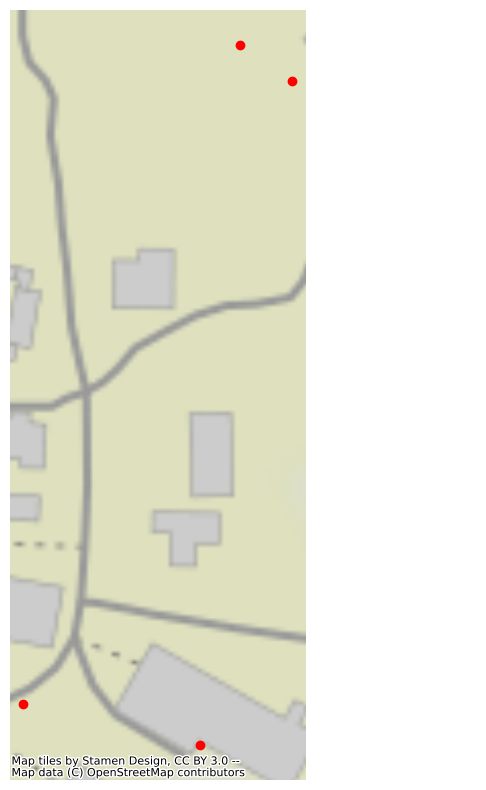

In [68]:
ax = gdf2_wm.plot(figsize=(8,8),color='red')
cx.add_basemap(ax=ax,zoom=16)
ax.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(data_path,'ldeo_map.png'))
plt.show()